# Chinese Tech Stock Sentiment Analysis using FinBert

By: Prajukta Dey

21052263

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://edition.cnn.com/2024/02/06/investing/china-stocks-rally-government-stimulus/index.html'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
text = soup.get_text()

In [4]:
text

" \n\n\n\n\n\n\n\n\nChina is pumping money into stocks and markets are loving it | CNN Business\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCNN values your feedback\n\n\n\n\n                                                        1. How relevant is this ad to you?\n                                                \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                                                2. Did you encounter any technical issues?\n                                        \n\n\n\n\n\n\n\n\n\n\n\n                                                                        Video player was slow to load content\n                                                                        \n\n\n\n                                                                        Video content never loaded\n                  

In [5]:
from transformers import BertTokenizer,BertForSequenceClassification

In [6]:
from transformers import pipeline

In [7]:
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
tokens = tokenizer(text, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/464k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2686 > 512). Running this sequence through the model will result in indexing errors


In [8]:
model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis", num_labels=3)

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [9]:
import requests
from bs4 import BeautifulSoup
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [10]:
def analyze_sentiment(sentence, model, tokenizer):
    tokens = tokenizer(sentence, truncation=True, return_tensors="pt", max_length=512)
    tokens['input_ids'] = tokens['input_ids'][:, :512]

    outputs = model(**tokens)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=-1)

    predicted_label = torch.argmax(probs, dim=-1).item()
    sentiment_text = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}[predicted_label]
    confidence_score = probs[0, predicted_label].item()

    return {'label': sentiment_text, 'score': confidence_score}

In [11]:
model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis", num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

url = 'https://edition.cnn.com/2024/02/06/investing/china-stocks-rally-government-stimulus/index.html'

In [12]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
paragraphs = soup.find_all('p')
text = ' '.join([paragraph.get_text() for paragraph in paragraphs])

sentences = text.split('.')
sentiment_results = []

In [13]:
#analyses the sentiment of non-empty sentences
for i, sentence in enumerate(sentences, start=1):
    if not sentence.strip():
        continue

    sentiment_result = analyze_sentiment(sentence, model, tokenizer)

    sentiment_results.append({
        'sentence_number': i,
        'sentence': sentence,
        'sentiment': sentiment_result
    })

In [14]:
for result in sentiment_results:
    print(f"Sentence {result['sentence_number']}: {result['sentence']}")
    print(f"Sentiment: {result['sentiment']}")
    print("\n")

Sentence 1: Markets 


 Hot Stocks 


 Fear & Greed Index 


 
            Latest Market News 


 
            Hot Stocks 


 
  Editor’s Note: Sign up for CNN’s Meanwhile in China newsletter, which explores what you need to know about the country’s rise and how it impacts the world
Sentiment: {'label': 'Neutral', 'score': 0.9997771382331848}


Sentence 2: 
 
            Chinese stocks staged their biggest rally in years Tuesday, after the country’s sovereign wealth fund said it would step up buying shares as officials scramble to draw a line under a three-year market rout
Sentiment: {'label': 'Positive', 'score': 0.9980061650276184}


Sentence 3: 
     
            The Shanghai Composite, mainland China’s benchmark index for large state-owned companies and blue-chip stocks, ended up 3
Sentiment: {'label': 'Positive', 'score': 0.9996092915534973}


Sentence 4: 2% on Tuesday, ending a six-day losing streak
Sentiment: {'label': 'Negative', 'score': 0.9931215643882751}


Sentence 5:  It m

In [15]:
pos = 0
neg = 0

for result in sentiment_results:
    sentimentlabel = result['sentiment']['label']

    if sentimentlabel == 'Positive':
        pos += 1
    elif sentimentlabel == 'Negative':
        neg += 1

if pos > neg:
  collectivesentiment = 'Positive'
elif neg > pos:
  collectivesentiment = 'Negative'

In [16]:
print("Collective Sentiment:")
print(f"Positive Count: {pos}")
print(f"Negative Count: {neg}")
print(f"Collective Sentiment: {collectivesentiment}")

Collective Sentiment:
Positive Count: 16
Negative Count: 7
Collective Sentiment: Positive


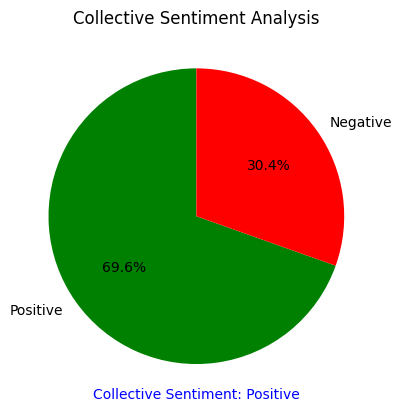

In [17]:
import matplotlib.pyplot as plt
labels = ['Positive', 'Negative']
sizes = [pos, neg]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Collective Sentiment Analysis')
plt.text(0, -1.2, f'Collective Sentiment: {collectivesentiment}', ha='center', va='center', color='blue')
plt.show()

In [18]:
#text summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [19]:
print(summarizer(text[:1024], max_length=300, min_length=30, do_sample=False))

[{'summary_text': 'Chinese stocks staged their biggest rally in years Tuesday, ending a six-day losing streak. The Shanghai Composite, mainland China’s benchmark index for large state-owned companies and blue-chip stocks, ended up 3.2%. It marks the biggest daily increase since March 2022. Smaller companies did even better.'}]
